In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import os

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '2bbd3bbf-20b0-4808-b0c3-ec1578ad7cfa',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-08-11T15:40:13.025Z', 'error_code': 0, 'error_message': None, 'elapsed': 8, 'credit_count': 1, 'notice': None, 'total_count': 9687}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10386, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [2]:
type(data)

dict

In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now',utc=True)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10386,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.945421e+07,1.945421e+07,False,NaN,1,NaN,NaN,None,2023-08-11T15:38:00.000Z,29364.059746,1.051967e+10,-22.1948,-0.307692,-0.388279,0.403920,-4.223117,13.684509,9.508098,5.712546e+11,48.8077,6.166453e+11,None,2023-08-11T15:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-11 15:40:27.093301+00:00
1,1027,Ethereum,ETH,ethereum,7226,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201497e+08,1.201497e+08,True,NaN,2,NaN,NaN,None,2023-08-11T15:38:00.000Z,1844.037179,3.300828e+09,-22.6589,-0.357964,-0.522339,-0.019851,-2.601231,6.354771,2.599049,2.215605e+11,18.9300,2.215605e+11,None,2023-08-11T15:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-11 15:40:27.093301+00:00
2,825,Tether USDt,USDT,tether,59298,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.353343e+10,8.668426e+10,True,NaN,3,NaN,NaN,None,2023-08-11T15:38:00.000Z,0.998975,1.668561e+10,-18.6673,-0.011139,0.002913,-0.022296,-0.106962,-0.119378,-0.154808,8.344782e+10,7.1297,8.659542e+10,None,2023-08-11T15:38:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-11 15:40:27.093301+00:00
3,1839,BNB,BNB,bnb,1563,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538532e+08,1.538532e+08,False,NaN,4,NaN,NaN,None,2023-08-11T15:38:00.000Z,238.620998,3.719554e+08,1.6892,-0.893730,-1.499989,-1.727218,-2.972457,3.172541,-22.990385,3.671261e+10,3.1367,3.671261e+10,None,2023-08-11T15:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-11 15:40:27.093301+00:00
4,52,XRP,XRP,xrp,1026,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.278728e+10,9.998852e+10,False,NaN,5,NaN,NaN,None,2023-08-11T15:38:00.000Z,0.628987,9.384787e+08,-37.6725,-0.552452,-0.301793,-5.134955,33.162353,22.277211,47.785579,3.320249e+10,2.8363,6.289865e+10,None,2023-08-11T15:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-11 15:40:27.093301+00:00
5,3408,USD Coin,USDC,usd-coin,13574,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.602342e+10,2.602342e+10,False,NaN,6,NaN,NaN,None,2023-08-11T15:38:00.000Z,1.000120,2.460586e+09,-19.0106,-0.009939,0.018475,-0.001132,0.009564,0.006224,0.008099,2.602655e+10,2.2233,2.602655e+10,None,2023-08-11T15:38:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-11 15:40:27.093301+00:00
6,74,Dogecoin,DOGE,dogecoin,765,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.405470e+11,1.405470e+11,True,NaN,7,NaN,NaN,None,2023-08-11T15:38:00.000Z,0.075413,2.512262e+08,-27.3999,-0.380125,-1.020623,1.316369,15.796595,23.450446,5.339696,1.059913e+10,0.9054,1.059913e+10,None,2023-08-11T15:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-11 15:40:27.093301+00:00
7,2010,Cardano,ADA,cardano,889,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.503029e+10,3.606117e+10,False,NaN,8,NaN,NaN,None,2023-08-11T15:38:00.000Z,0.294260,1.497308e+08,-28.9211,-0.594418,-1.228000,-0.461229,0.687900,5.466092,-19.186451,1.030800e+10,0.8807,1.324168e+10,None,2023-08-11T15:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-11 15:40:27.093301+00:00
8,5426,Solana,SOL,solana,496,2020-04-10T00:00:00.000Z,"[

In [7]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '2bbd3bbf-20b0-4808-b0c3-ec1578ad7cfa',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    #df2 = pd.json_normalize(data['data'])
    #df2['timestamp'] = pd.to_datetime('now',utc=True)
    #df = pd.concat([df, df2], ignore_index=True)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now',utc=True)
       
    if not os.path.isfile(r'C:\Projects\Crypto_API.csv'):
        df.to_csv(r'C:\Projects\Crypto_API.csv',header= 'column_names')
    else:
        df.to_csv(r'C:\Projects\Crypto_API.csv',mode='a',header=False)

In [8]:
from time import time
from time import sleep

for i in range(300):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

{'status': {'timestamp': '2023-08-11T15:42:53.938Z', 'error_code': 0, 'error_message': None, 'elapsed': 29, 'credit_count': 1, 'notice': None, 'total_count': 9687}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10386, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

{'status': {'timestamp': '2023-08-11T15:43:54.291Z', 'error_code': 0, 'error_message': None, 'elapsed': 31, 'credit_count': 1, 'notice': None, 'total_count': 9687}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10386, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

{'status': {'timestamp': '2023-08-11T15:44:54.603Z', 'error_code': 0, 'error_message': None, 'elapsed': 32, 'credit_count': 1, 'notice': None, 'total_count': 9687}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10386, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [10]:
df3 = pd.read_csv(r'C:\Projects\Crypto_API.csv')

df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10386,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.945421e+07,1.945421e+07,False,NaN,1,NaN,NaN,NaN,2023-08-11T15:41:00.000Z,29354.814249,1.051866e+10,-22.1609,-0.436429,-0.432956,0.375393,-3.939853,13.613145,9.481221,5.710748e+11,48.7924,6.164511e+11,NaN,2023-08-11T15:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-11 15:42:54.316452+00:00
1,1,1027,Ethereum,ETH,ethereum,7226,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201497e+08,1.201497e+08,True,NaN,2,NaN,NaN,NaN,2023-08-11T15:41:00.000Z,1843.478753,3.304669e+09,-22.5619,-0.529735,-0.564081,-0.056969,-2.323574,6.348428,2.570728,2.214934e+11,18.9243,2.214934e+11,NaN,2023-08-11T15:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-11 15:42:54.316452+00:00
2,2,825,Tether USDt,USDT,tether,59298,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.353343e+10,8.668426e+10,True,NaN,3,NaN,NaN,NaN,2023-08-11T15:41:00.000Z,0.999024,1.701159e+10,-17.0476,-0.007382,-0.001508,-0.003988,-0.093956,-0.113677,-0.167833,8.345187e+10,7.1301,8.659962e+10,NaN,2023-08-11T15:41:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-11 15:42:54.316452+00:00
3,3,1839,BNB,BNB,bnb,1563,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.538532e+08,1.538532e+08,False,NaN,4,NaN,NaN,NaN,2023-08-11T15:41:00.000Z,238.712043,3.710654e+08,1.4166,-0.841523,-1.475283,-1.699790,-2.568436,3.236398,-22.963324,3.672662e+10,3.1379,3.672662e+10,NaN,2023-08-11T15:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-11 15:42:54.316452+00:00
4,4,52,XRP,XRP,xrp,1026,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.278728e+10,9.998852e+10,False,NaN,5,NaN,NaN,NaN,2023-08-11T15:41:00.000Z,0.629092,9.393366e+08,-37.5627,-0.494956,-0.323733,-5.105510,33.349440,22.279008,47.813871,3.320804e+10,2.8364,6.290916e+10,NaN,2023-08-11T15:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-11 15:42:54.316452+00:00
5,5,3408,USD Coin,USDC,usd-coin,13574,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.602342e+10,2.602342e+10,False,NaN,6,NaN,NaN,NaN,2023-08-11T15:41:00.000Z,1.000133,2.462714e+09,-18.8524,0.000835,0.008643,0.014248,0.017111,0.006018,-0.010129,2.602688e+10,2.2230,2.602688e+10,NaN,2023-08-11T15:41:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-11 15:42:54.316452+00:00
6,6,74,Dogecoin,DOGE,dogecoin,765,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.405470e+11,1.405470e+11,True,NaN,7,NaN,NaN,NaN,2023-08-11T15:41:00.000Z,0.075437,2.509523e+08,-27.5682,-0.302409,-1.062916,1.322951,15.973394,23.509616,5.378867,1.060244e+10,0.9056,1.060244e+10,NaN,2023-08-11T15:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-11 15:42:54.316452+00:00
7,7,2010,Cardano,ADA,cardano,889,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.503029e+10,3.606117e+10,False,NaN,8,NaN,NaN,NaN,2023-08-11T15:41:00.000Z,0.294321,1.495437e+08,-29.0105,-0.553598,-1.233919,-0.480340,0.863345,5.677672,-19.138526,1.031015e+10,0.8809,1.324444e+10,NaN,2023-08-11T15:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-11 15:42:54.316452+00:00
8,8,5426,Solana,SOL,solana,496,2020-04-10T00:

In [12]:
pd.set_option('display.float_format',lambda x: '%.5f' % x)

In [13]:
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10386,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19454212.00000,19454212.00000,False,NaN,1,NaN,NaN,NaN,2023-08-11T15:41:00.000Z,29354.81425,10518656767.24792,-22.16090,-0.43643,-0.43296,0.37539,-3.93985,13.61315,9.48122,571074779618.41357,48.79240,616451099226.56995,NaN,2023-08-11T15:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-11 15:42:54.316452+00:00
1,1,1027,Ethereum,ETH,ethereum,7226,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120149688.38660,120149688.38660,True,NaN,2,NaN,NaN,NaN,2023-08-11T15:41:00.000Z,1843.47875,3304668717.73656,-22.56190,-0.52973,-0.56408,-0.05697,-2.32357,6.34843,2.57073,221493397664.43671,18.92430,221493397664.44000,NaN,2023-08-11T15:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-11 15:42:54.316452+00:00
2,2,825,Tether USDt,USDT,tether,59298,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83533427826.00142,86684257831.22757,True,NaN,3,NaN,NaN,NaN,2023-08-11T15:41:00.000Z,0.99902,17011588368.55384,-17.04760,-0.00738,-0.00151,-0.00399,-0.09396,-0.11368,-0.16783,83451868612.59717,7.13010,86599622253.98000,NaN,2023-08-11T15:41:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-11 15:42:54.316452+00:00
3,3,1839,BNB,BNB,bnb,1563,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,153853220.57880,153853220.57880,False,NaN,4,NaN,NaN,NaN,2023-08-11T15:41:00.000Z,238.71204,371065384.41357,1.41660,-0.84152,-1.47528,-1.69979,-2.56844,3.23640,-22.96332,36726616616.45569,3.13790,36726616616.46000,NaN,2023-08-11T15:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-11 15:42:54.316452+00:00
4,4,52,XRP,XRP,xrp,1026,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,52787284454.00000,99988519823.00000,False,NaN,5,NaN,NaN,NaN,2023-08-11T15:41:00.000Z,0.62909,939336554.67487,-37.56270,-0.49496,-0.32373,-5.10551,33.34944,22.27901,47.81387,33208036054.52068,2.83640,62909157760.25000,NaN,2023-08-11T15:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-11 15:42:54.316452+00:00
5,5,3408,USD Coin,USDC,usd-coin,13574,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,26023419588.02357,26023419588.02357,False,NaN,6,NaN,NaN,NaN,2023-08-11T15:41:00.000Z,1.00013,2462713896.50510,-18.85240,0.00083,0.00864,0.01425,0.01711,0.00602,-0.01013,26026881010.08655,2.22300,26026881010.09000,NaN,2023-08-11T15:41:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-11 15:42:54.316452+00:00
6,6,74,Dogecoin,DOGE,dogecoin,765,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,140547016383.70520,140547016383.70520,True,NaN,7,NaN,NaN,NaN,2023-08-11T15:41:00.000Z,0.07544,250952319.84700,-27.56820,-0.30241,-1.06292,1.32295,15.97339,23.50962,5.37887,10602441752.08747,0.90560,10602441752.09000,NaN,2023-08-11T15:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-11 15:42:54.316452+00:00
7,7,2010,Cardano,ADA,cardano,889,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35030291978.48400,36061170836.35500,False,NaN,8,NaN,NaN,NaN,2023-08-11T15:41:00.000Z,0.29432,149543733.58882,-29.01050,-0.55360,-1.23392,-0.48034,0.86334,5.67767,-19.13853,10310147

In [14]:
df4 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.47160,-0.42248,0.32222,-3.93460,13.60570,9.45926
Ethereum,-0.57214,-0.54980,-0.10541,-2.30149,6.34225,2.53661
Tether USDt,0.00325,-0.00464,-0.00567,-0.13473,-0.09405,-0.16444
BNB,-0.89537,-1.48842,-1.75680,-2.42099,3.16829,-22.99297
XRP,-0.54474,-0.32442,-5.13112,33.50169,22.17621,47.78312
USD Coin,0.00840,0.00425,0.00136,-0.01767,0.03056,-0.01889
Dogecoin,-0.33799,-1.05149,1.28038,16.09781,23.52413,5.35590
Cardano,-0.61145,-1.24084,-0.50550,0.99725,5.70040,-19.13341
Solana,-0.19297,0.33172,5.58738,10.03031,61.57293,18.07521


In [15]:
df5 = df4.stack()
df5

name                                 
Bitcoin  quote.USD.percent_change_1h    -0.47160
         quote.USD.percent_change_24h   -0.42248
         quote.USD.percent_change_7d     0.32222
         quote.USD.percent_change_30d   -3.93460
         quote.USD.percent_change_60d   13.60570
                                          ...   
Dai      quote.USD.percent_change_24h   -0.05492
         quote.USD.percent_change_7d    -0.06361
         quote.USD.percent_change_30d   -0.00082
         quote.USD.percent_change_60d   -0.01801
         quote.USD.percent_change_90d   -0.07401
Length: 90, dtype: float64

In [16]:
type(df5)

pandas.core.series.Series

In [18]:
df6 = df5.to_frame(name='values')
df6

values
name                                         
Bitcoin quote.USD.percent_change_1h  -0.47160
        quote.USD.percent_change_24h -0.42248
        quote.USD.percent_change_7d   0.32222
        quote.USD.percent_change_30d -3.93460
        quote.USD.percent_change_60d 13.60570
...                                       ...
Dai     quote.USD.percent_change_24h -0.05492
        quote.USD.percent_change_7d  -0.06361
        quote.USD.percent_change_30d -0.00082
        quote.USD.percent_change_60d -0.01801
        quote.USD.percent_change_90d -0.07401

[90 rows x 1 columns]

In [20]:
type(df6)

pandas.core.frame.DataFrame

In [23]:
index = pd.Index(range(90))

df7 = df6.set_index(index)
df7 = df6.reset_index()

df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.47160
1,Bitcoin,quote.USD.percent_change_24h,-0.42248
2,Bitcoin,quote.USD.percent_change_7d,0.32222
3,Bitcoin,quote.USD.percent_change_30d,-3.93460
4,Bitcoin,quote.USD.percent_change_60d,13.60570
...,...,...,...
85,Dai,quote.USD.percent_change_24h,-0.05492
86,Dai,quote.USD.percent_change_7d,-0.06361
87,Dai,quote.USD.percent_change_30d,-0.00082
88,Dai,quote.USD.percent_change_60d,-0.01801


In [51]:
df8 = df7.rename(columns={'level_1': 'percent_change'})
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.47160
1,Bitcoin,quote.USD.percent_change_24h,-0.42248
2,Bitcoin,quote.USD.percent_change_7d,0.32222
3,Bitcoin,quote.USD.percent_change_30d,-3.93460
4,Bitcoin,quote.USD.percent_change_60d,13.60570
...,...,...,...
85,Dai,quote.USD.percent_change_24h,-0.05492
86,Dai,quote.USD.percent_change_7d,-0.06361
87,Dai,quote.USD.percent_change_30d,-0.00082
88,Dai,quote.USD.percent_change_60d,-0.01801


In [53]:
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df8

,name,percent_change,values
0,Bitcoin,1h,-0.47160
1,Bitcoin,24h,-0.42248
2,Bitcoin,7d,0.32222
3,Bitcoin,30d,-3.93460
4,Bitcoin,60d,13.60570
...,...,...,...
85,Dai,24h,-0.05492
86,Dai,7d,-0.06361
87,Dai,30d,-0.00082
88,Dai,60d,-0.01801


In [25]:
import seaborn as sns
import matplotlib as plt

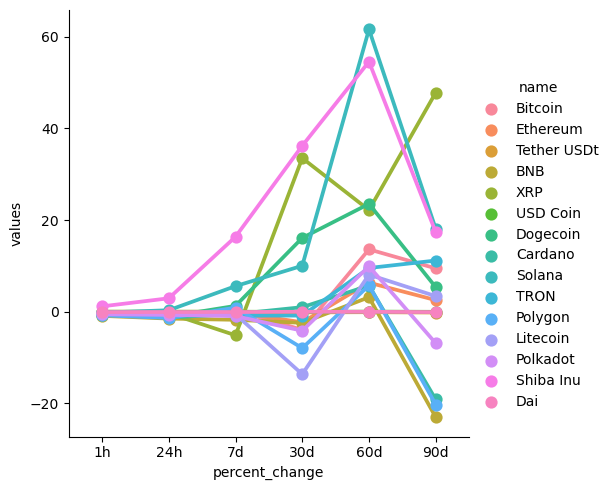

In [54]:
sns.catplot(x='percent_change', y='values', hue='name', data=df8, kind='point')

In [59]:
df9 = df3[['name','quote.USD.price','timestamp']]
df9 = df9.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,29354.81425,2023-08-11 15:42:54.316452+00:00
15,Bitcoin,29351.20150,2023-08-11 15:43:54.667434+00:00
30,Bitcoin,29351.03630,2023-08-11 15:44:54.977046+00:00


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

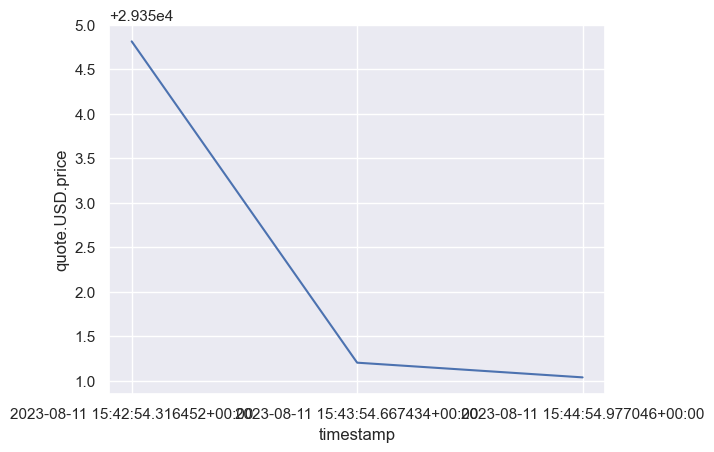

In [60]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp',y='quote.USD.price', data = df9)